# Importing Necessary Libraries

In [4]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import os

In [5]:
cur_dict = {0:10,1:20,2:50,3:100,4:200,5:500,6:2000}

# Load Data Function

In [6]:
def load_data(working_dir):
    X = []
    Y = []

    for root, dirs, all_images in os.walk(working_dir):
        for image in all_images:
            img = cv2.imread(os.path.join(root, image))
            img = cv2.resize(img, (300, 300))
            img = img / 255
            X.append(img)
            Y.append(root.split('\\')[-1])

    X = np.array(X)
    Y = np.array(Y).astype(int)

    return X, Y

### Taining Data

In [7]:
working_dir = "D:\\IT-VEDANT\\CV\\Currency_Classification_Project\\dataset\\training\\"
X, Y = load_data(working_dir)

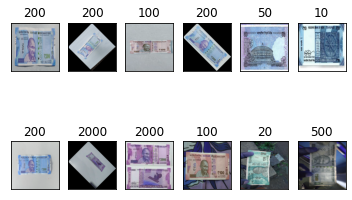

In [8]:
import random
sample_img = [random.randint(1,len(X)) for i in range(12)]
sample_img

fig, axes = plt.subplots(2, 6,figsize=(10, 7))

for i in range(12):
    axes[i // 6, i % 6].imshow(X[sample_img[i]])
    axes[i // 6, i % 6].set_title(f"{cur_dict[Y[sample_img[i]]]}")
    axes[i // 6, i % 6].get_xaxis().set_visible(False)
    axes[i // 6, i % 6].get_yaxis().set_visible(False)


# Modelling

In [9]:
# Define the CNN model architecture.
model = Sequential()

# 1 CNN
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D((2, 2)))

# 2CNN
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3 Fully Connected Layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

# 4 Output Layer
model.add(Dense(7, activation='softmax'))

# Compile the model.
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               4

In [11]:
# Train the model.
model.fit(X, Y, batch_size=32, epochs=3)

Epoch 1/3
397/397 [==============================] - 643s 2s/step - loss: 1.2211 - accuracy: 0.6111
Epoch 2/3
397/397 [==============================] - 630s 2s/step - loss: 0.3890 - accuracy: 0.8745
Epoch 3/3
397/397 [==============================] - 634s 2s/step - loss: 0.1480 - accuracy: 0.9565


In [26]:
YP = model.predict(X[[10000]])

1/1 [==============================] - 0s 42ms/step


In [27]:
YP.argmax()

5

In [25]:
Y[10000]

5

# Dumping the model

In [31]:
import pickle

with open("currency_prediction_model_3", "wb") as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-25 20:37:14         3514
metad

In [32]:
import joblib
joblib.dump(model,"currency_prediction_model_3_joblib.pkl")

# Dumping Inputs & Labels

In [35]:
X.shape

(12699, 300, 300, 3)

In [42]:
joblib.dump(X,"Input_X.pkl")

['Input_X.pkl']

In [41]:
joblib.dump(Y,"Labels_Y.pkl")

['Labels_Y.pkl']

In [45]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
